In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


In [3]:
# Read data
kdata = pd.read_csv("gre.csv", sep=';')
kdata.head()

,Verbal,Quantitative
0,152,166
1,159,137
2,158,162
3,141,155
4,140,150


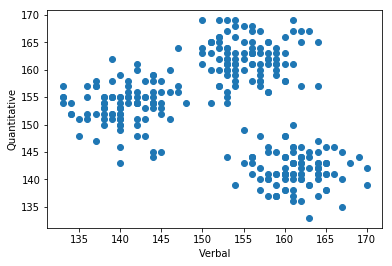

In [4]:
# Plot the data
fig, ax = plt.subplots()
ax.scatter(kdata.iloc[:, 0], kdata.iloc[:, 1])
plt.xlabel(kdata.columns.values[0])
plt.ylabel(kdata.columns.values[1])
plt.show()


In [5]:
# Apply kmeans
kmeans = KMeans(n_clusters=3)
kmeans.fit_predict(kdata)
labels = kmeans.labels_
centers = kmeans.cluster_centers_


Text(0, 0.5, 'Quantitative')

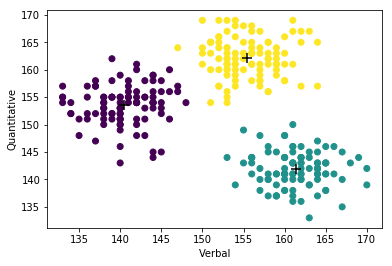

In [6]:
# Plot clustering result
fig, ax = plt.subplots()
ax.scatter(kdata.iloc[:, 0], kdata.iloc[:, 1], c=labels)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='+', s=100);
plt.xlabel(kdata.columns.values[0])
plt.ylabel(kdata.columns.values[1])


In [7]:
# Silhouette
silhouette = silhouette_score(kdata, labels)
print(silhouette)


0.659699833225695


[]

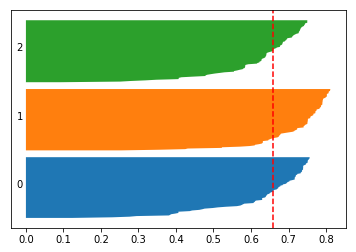

In [8]:
# Silhouette plot
silhouette_values = silhouette_samples(kdata, labels)
fig, ax = plt.subplots()
y_lower = 10
for i in range(len(centers)):
    ith_cluster_silhouette_values = silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values)
    ax.text(-0.025, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
ax.axvline(x=silhouette, color="red", linestyle="--")
ax.set_yticks([])


In [1]:
# Select number of clusters
fig, ax = plt.subplots()
cluster_nums = [2, 3, 4, 5, 6, 7, 8]
silhouettes = []
for n_clusters in cluster_nums:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit_predict(kdata)
    labels = kmeans.labels_
    silhouettes.append(silhouette_score(kdata, labels))
ax.plot(cluster_nums, silhouettes)
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Silhouette")

plt.show()

